In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


In [2]:
train_dir = 'train'
test_dir = 'test'
target_var = os.listdir(train_dir)
target_var

['happy', 'sad', 'fearful', 'neutral', 'angry', 'disgusted', 'surprised']

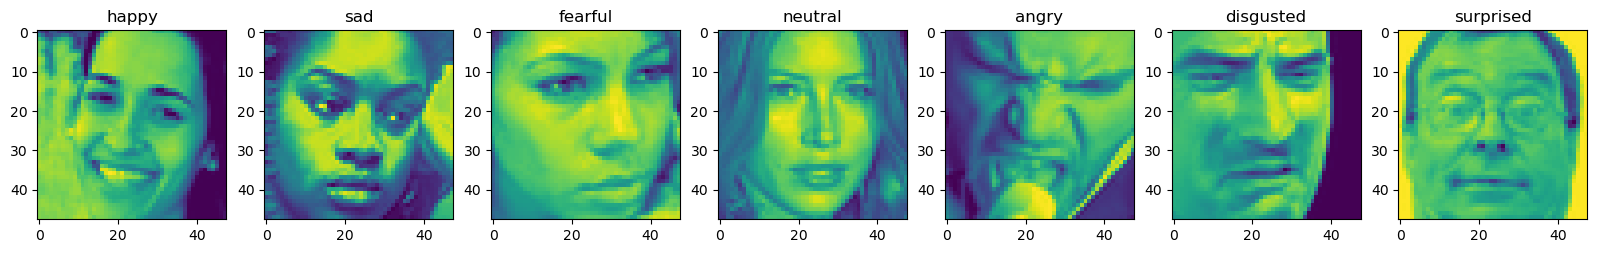

In [3]:
fig, axes = plt.subplots(1, 7, figsize=(20, 8))
for i in range(len(target_var)):
    # Use os.path.join to concatenate directory and file parts
    d = os.path.join(train_dir, target_var[i], os.listdir(os.path.join(train_dir, target_var[i]))[0])
    
    axes[i].imshow(plt.imread(d))
    axes[i].set_title(target_var[i])

plt.show()

EDA (Exploring number of images in each class)

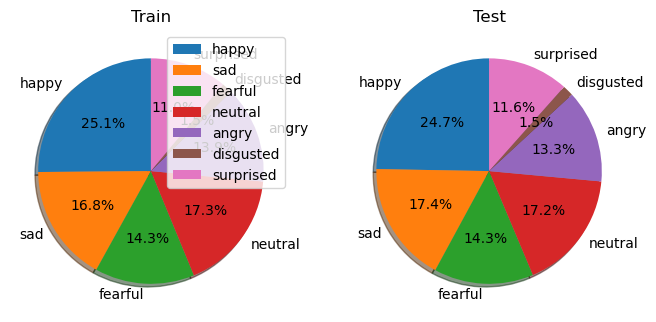

Emotion: happy
	Training: 7215
	Testing : 1774
Emotion: sad
	Training: 4830
	Testing : 1247
Emotion: fearful
	Training: 4097
	Testing : 1024
Emotion: neutral
	Training: 4965
	Testing : 1233
Emotion: angry
	Training: 3995
	Testing : 958
Emotion: disgusted
	Training: 436
	Testing : 111
Emotion: surprised
	Training: 3171
	Testing : 831


In [4]:
# Plot pie charts for the distribution of images
x_train = np.array([len(os.listdir(os.path.join(train_dir, i))) for i in target_var])
x_test = np.array([len(os.listdir(os.path.join(test_dir, i))) for i in target_var])
label = target_var

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].pie(x_train, labels=label, autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].pie(x_test, labels=label, autopct='%1.1f%%', shadow=True, startangle=90)
axes[0].set_title('Train')
axes[1].set_title('Test')
axes[0].legend(label, loc="upper right")  # Add legend

plt.show()

# Print counts of training and testing images for each emotion category
for i in target_var:
    print('Emotion: ' + i)
    print('\tTraining: ' + str(len(os.listdir(os.path.join(train_dir, i)))))
    print('\tTesting : ' + str(len(os.listdir(os.path.join(test_dir, i)))))


    


## Data loading and preprocessing

- 0/1 Normalization 
- Grayscale
- input shape resize for CNN (300x300)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using IDG to load images from directory
train_idg = ImageDataGenerator(rescale=1./255, validation_split=0.3) # 30 percent validation split for taining 
# train_idg = ImageDataGenerator(
#     rescale=1./255,
#     validation_split=0.3,
#     rotation_range=15,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )
test_idg = ImageDataGenerator(rescale=1./255)

# Specify parameters/arguments for data generation
img_size = (48, 48)
batch_size = 64

arg_train = {'target_size': img_size,
             'color_mode': 'grayscale',
             'class_mode' : 'categorical',
             'batch_size': batch_size}
arg_test = {'target_size': img_size,
            'color_mode': 'grayscale',
            'class_mode' : 'categorical',
            'batch_size': batch_size,
            'shuffle': False}

train = train_idg.flow_from_directory(directory=train_dir, subset='training', **arg_train)
valid = train_idg.flow_from_directory(directory=train_dir, subset='validation', **arg_train)
test  = test_idg.flow_from_directory(directory=test_dir, **arg_test)

2023-11-22 09:18:50.166487: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 20099 images belonging to 7 classes.
Found 8610 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## CNN

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

### Building Model

In [7]:
import time
# Record the start time
start_time = time.time()

model = tf.keras.Sequential()

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(7,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                       

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(
    train ,
    validation_data=valid,
    epochs=5)

Epoch 1/5
315/315 [==============================] - 308s 964ms/step - loss: 2.3633 - accuracy: 0.1954 - val_loss: 1.8285 - val_accuracy: 0.2494
Epoch 2/5
315/315 [==============================] - 287s 911ms/step - loss: 1.9002 - accuracy: 0.2593 - val_loss: 1.6764 - val_accuracy: 0.3300
Epoch 3/5
315/315 [==============================] - 293s 929ms/step - loss: 1.6645 - accuracy: 0.3453 - val_loss: 1.5079 - val_accuracy: 0.4201
Epoch 4/5
315/315 [==============================] - 295s 936ms/step - loss: 1.5150 - accuracy: 0.4123 - val_loss: 1.4115 - val_accuracy: 0.4593
Epoch 5/5
315/315 [==============================] - 296s 940ms/step - loss: 1.4351 - accuracy: 0.4494 - val_loss: 1.4157 - val_accuracy: 0.4617


In [9]:
# Record the end time
end_time = time.time()

# Calculate and print the elapsed time
elapsed_time = end_time - start_time
print(f"Training completed in {elapsed_time} seconds.")


Training completed in 1478.7492678165436 seconds.


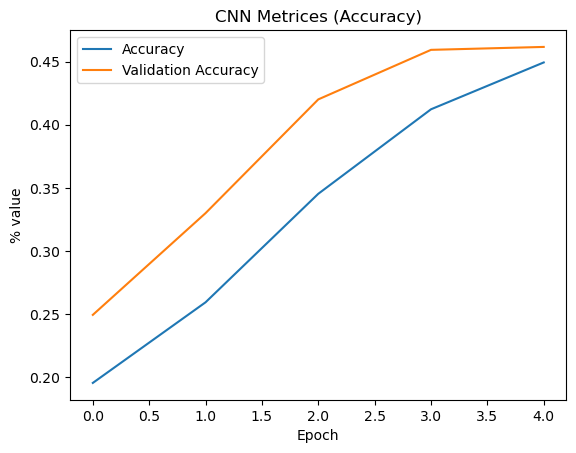

In [10]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Metrices (Accuracy)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

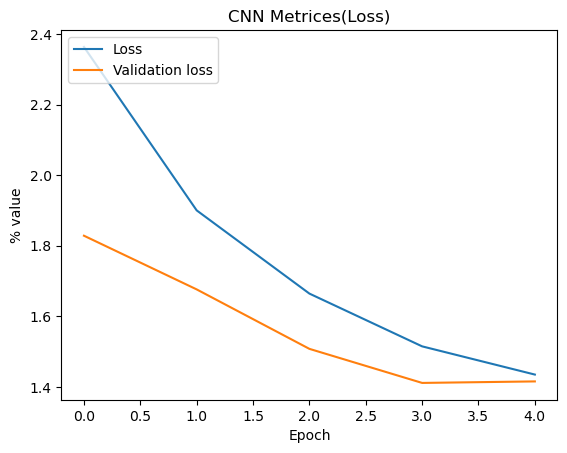

In [11]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('CNN Metrices(Loss)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

### Testing and evaluation

In [12]:
y_pred = model.predict(test)

113/113 [==============================] - 24s 207ms/step


In [13]:
y_pred_labels = []
for i in y_pred:
    y_pred_labels.append(np.argmax(i))

In [14]:
y_actual = test.classes[test.index_array]

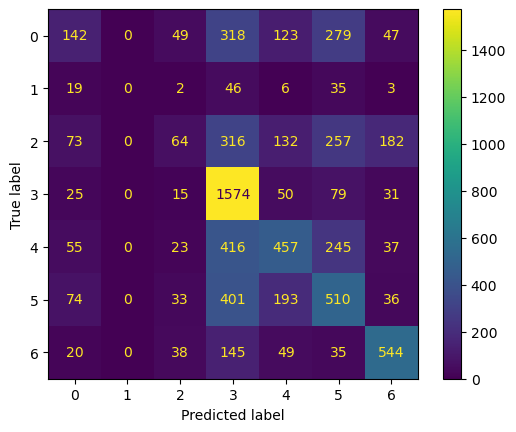

In [15]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_actual, y_pred_labels)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_pred_labels, digits=4))

              precision    recall  f1-score   support

           0     0.3480    0.1482    0.2079       958
           1     0.0000    0.0000    0.0000       111
           2     0.2857    0.0625    0.1026      1024
           3     0.4894    0.8873    0.6309      1774
           4     0.4525    0.3706    0.4075      1233
           5     0.3542    0.4090    0.3796      1247
           6     0.6182    0.6546    0.6359       831

    accuracy                         0.4585      7178
   macro avg     0.3640    0.3617    0.3378      7178
weighted avg     0.4190    0.4585    0.4079      7178

